In [63]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
pd.options.display.max_rows = 4000
pd.set_option('display.max_columns', 100)
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re, string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jasonjoseph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jasonjoseph/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jasonjoseph/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Collection

In [28]:
dft = pd.read_csv("True.csv")  #reading in the csv file into a Pandas Data Frame
dft.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [14]:
dft.shape  #checked to see shape of dataset

(21417, 3)

In [175]:
dft.date.value_counts()  #checked to see time frame of news articles present in dataset

December 20, 2017      182
December 6, 2017       166
November 30, 2017      162
November 9, 2017       158
October 13, 2017       155
September 21, 2017     153
December 21, 2017      151
September 6, 2017      151
September 7, 2017      149
September 22, 2017     146
October 19, 2017       145
November 8, 2017       143
September 12, 2017     143
October 26, 2017       142
October 18, 2017       142
October 16, 2017       141
September 15, 2017     141
December 7, 2017       140
October 24, 2017       139
October 12, 2017       137
September 26, 2017     136
October 25, 2017       136
December 8, 2017       134
November 29, 2017      134
December 14, 2017      133
September 14, 2017     131
December 5, 2017       131
November 21, 2017      129
November 2, 2017       128
November 1, 2017       127
December 13, 2017      126
September 28, 2017     126
October 11, 2017       125
November 28, 2017      125
November 17, 2017      124
November 24, 2017      124
December 19, 2017      124
S

In [15]:
type(dft.text.iloc[0]) #checked to see type of object the text column was 

str

In [44]:
dft.subject.value_counts()  #checked to see the different values within the subject column 

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [27]:
dff = pd.read_csv("Fake.csv")  #reading in the csv file into a Pandas Data Frame
dff.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [18]:
dff.shape  #checked to see shape of dataset

(23481, 3)

In [17]:
type(dff.text.iloc[0]) #checked to see type of object the text column was 

str

In [45]:
dff.subject.value_counts()  #checked to see the different values within the subject column

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

# Data Preprocessing/Cleaning

In [29]:
dft["Category"] = 1
dff["Category"] = 0
df = pd.concat([dft, dff])  #merging both datasets together
df.head()

,title,text,subject,date,Category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


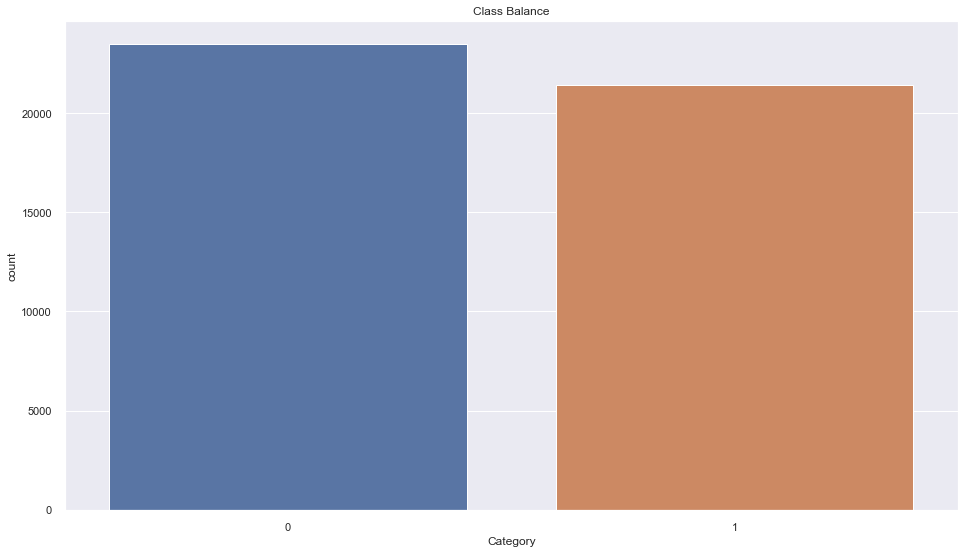

In [178]:
plt.figure(figsize = (16, 9))
sns.set_style("darkgrid")  #checked to see visual of balance between True & Fake articles
sns.countplot(df.Category).set(title = "Class Balance")
plt.savefig("Data_Balance.png")

From the visual above we can see that the dataset is balanced.

In [30]:
df.isna().sum()  #checked to see if there were any missing values

title       0
text        0
subject     0
date        0
Category    0
dtype: int64

In [34]:
df.shape  #checked to see new shape of dataset

(44898, 5)

In [35]:
df.subject.value_counts()  #checked to see the different values within the subject column

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

Text(0.5, 1.0, 'Subject Distribution')

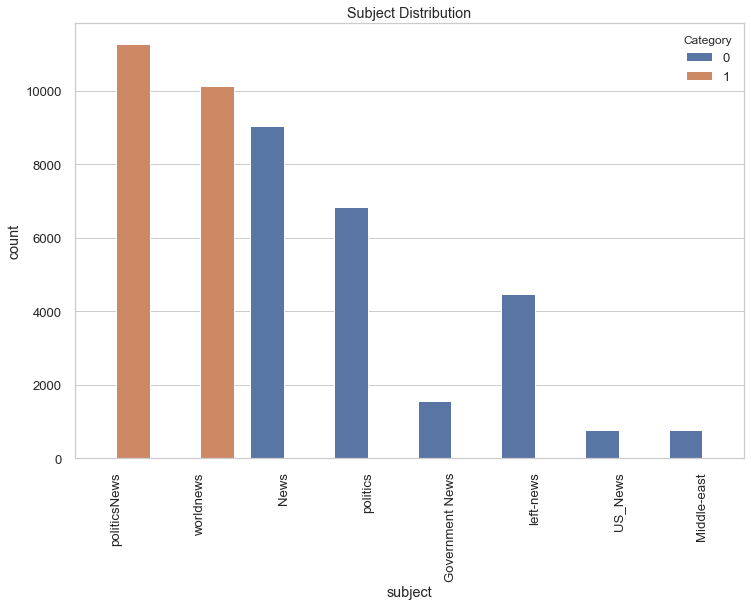

In [48]:
plt.figure(figsize = (12,8))  #graph to show the different values of the subjects from both datasets combined
sns.set(style = "whitegrid",font_scale = 1.2)
ax = sns.countplot(x = "subject", hue = "Category", data = df)
ax.set_xticklabels(chart.get_xticklabels(),rotation=90)
ax.set_title("Subject Distribution")

In [49]:
df['text'] = df['text'] + " " + df['title']  
del df['title']
del df['subject']                    #removing unecessary columns
del df['date']
df.head()  #since subject column had different values for both categories I took it out and merged the title & text 

,text,Category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


Setting Stop Words & Removing Punctuation

In [58]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

The data may consist of different URL & HTML tags which might make it difficult for the model to predict properly. To prevent that from happening I cleaned the data to make the model more efficient.

In [59]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's

def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

#Apply function on review column

df['text'] = df['text'].apply(denoise_text)

Grabbing the corpus of all the articles combined 

In [75]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)
corpus[:5]

['WASHINGTON', '(Reuters)', 'head', 'conservative', 'Republican']

In [76]:
from collections import Counter  #checked to see how many times the top 10 most frequent words were in the articles
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'Trump': 111503,
 'said': 93162,
 'would': 54613,
 'U.S.': 50441,
 'President': 33180,
 'people': 33115,
 'also': 30325,
 'one': 29370,
 'Donald': 27795,
 'said.': 26194}

In [77]:
from sklearn.feature_extraction.text import CountVectorizer  #function to get the top text n_grams

def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range = (g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [92]:
get_top_text_ngrams(df.text, 6, 2)  #testing out function

[('donald trump', 27311),
 ('united states', 18931),
 ('white house', 16299),
 ('hillary clinton', 10198),
 ('new york', 9309),
 ('featured image', 7612)]

TF-IDF

In [113]:
X = df.text
y = df.Category

In [114]:
def tfidf(X, y, stopwords_list): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    
    vectorizer = TfidfVectorizer(stop_words = stop)
    
    tf_idf_train = vectorizer.fit_transform(X_train)
    tf_idf_test = vectorizer.transform(X_test)
    
    
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer

In [119]:
tf_idf_train, tf_idf_test, y_train, y_test, vectorizer = tfidf(X, y, stop)

# EDA

## Word Cloud for Real Articles (Label = 1)

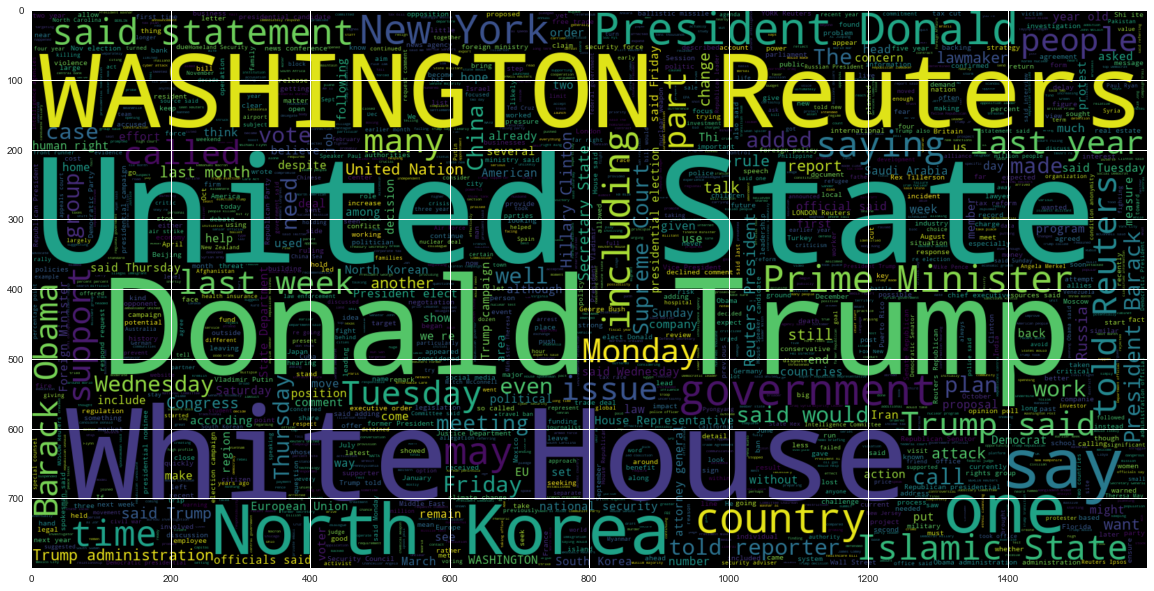

In [65]:
plt.figure(figsize = (20,20)) # Text that is True
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.Category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

Words such as United States, Donald Trump & White House were prevalent.

## Word Cloud for Fake Articles (Label = 0)

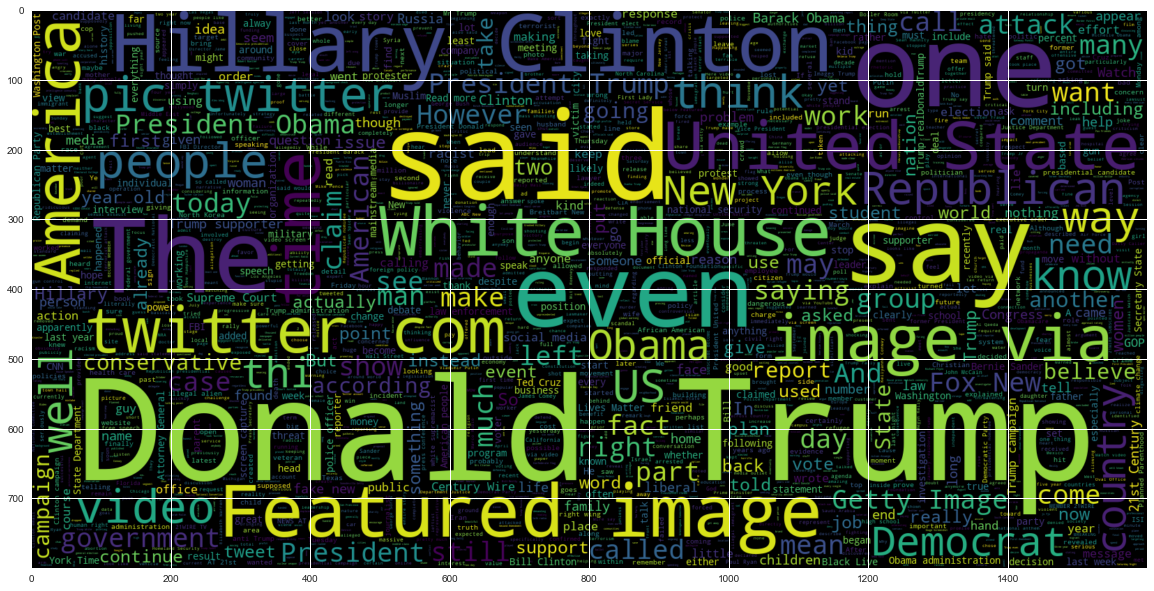

In [66]:
plt.figure(figsize = (20, 20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.Category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

Words such as Twitter, Hillary Clinton & America were prevalent.

### Unigram Analysis

Real News

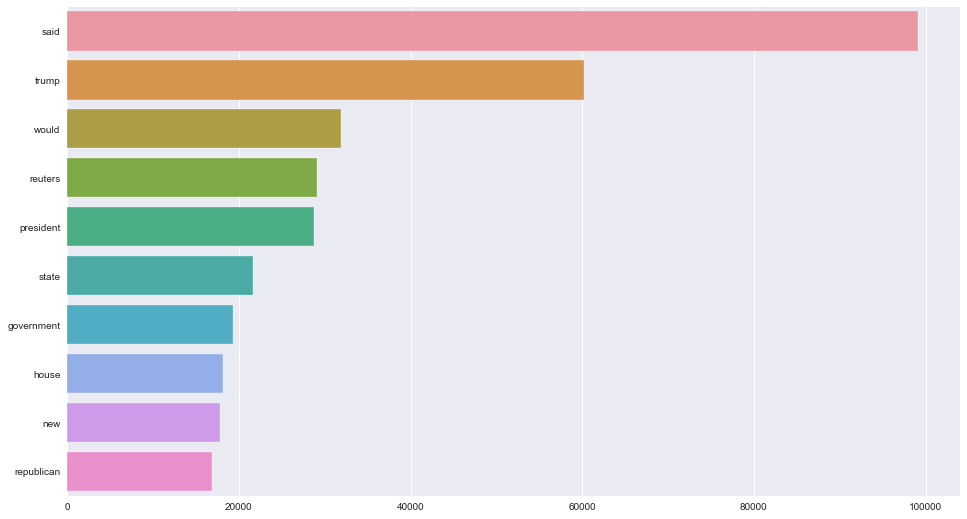

In [96]:
plt.figure(figsize = (16, 9))  
most_common_uni = get_top_text_ngrams(df[df.Category == 1].text, 10, 1)
most_common_uni = dict(most_common_uni)
sns.barplot(x = list(most_common_uni.values()), y = list(most_common_uni.keys()))

Fake News

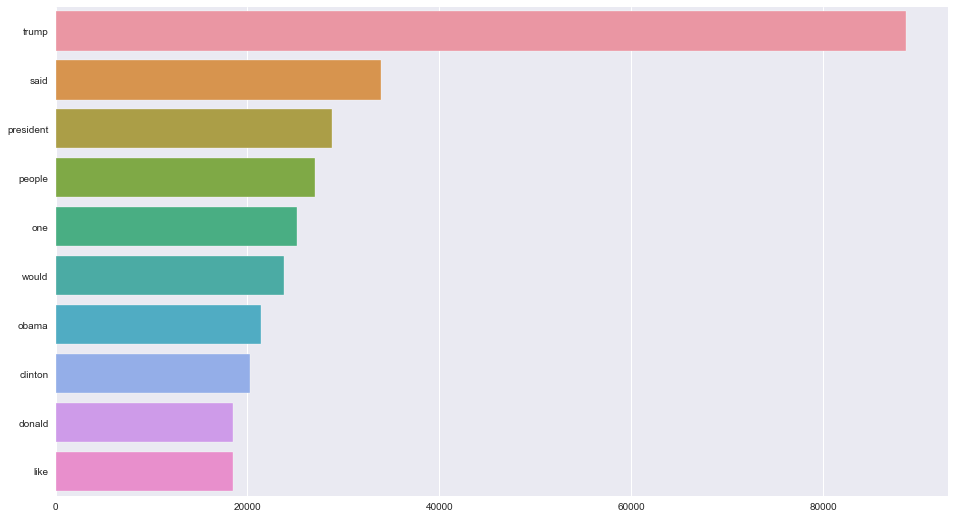

In [97]:
plt.figure(figsize = (16, 9))
most_common_uni = get_top_text_ngrams(df[df.Category == 0].text, 10, 1)
most_common_uni = dict(most_common_uni)
sns.barplot(x = list(most_common_uni.values()), y = list(most_common_uni.keys()))

### Bigram Analysis

Real News

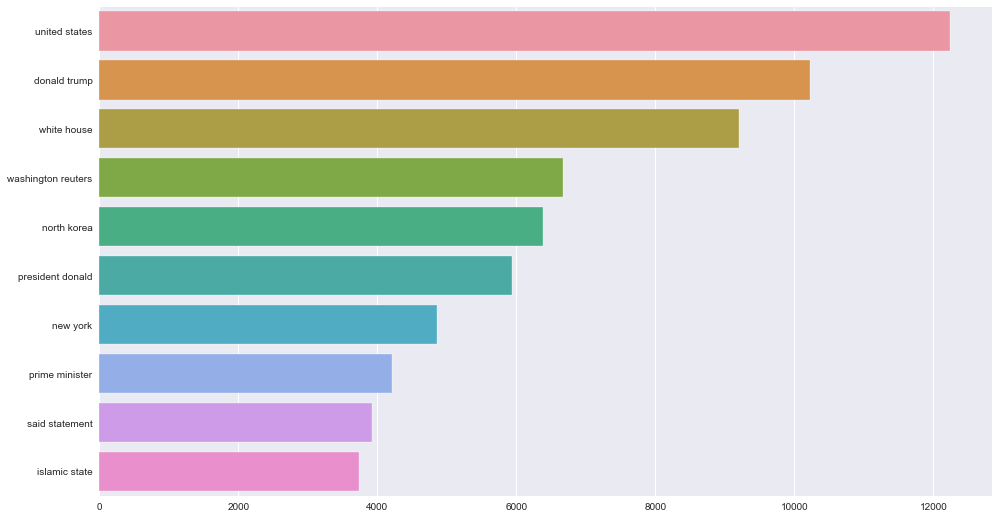

In [98]:
plt.figure(figsize = (16, 9))
most_common_bi = get_top_text_ngrams(df[df.Category == 1].text, 10, 2)
most_common_bi = dict(most_common_bi)
sns.barplot(x = list(most_common_bi.values()), y = list(most_common_bi.keys()))

Fake News

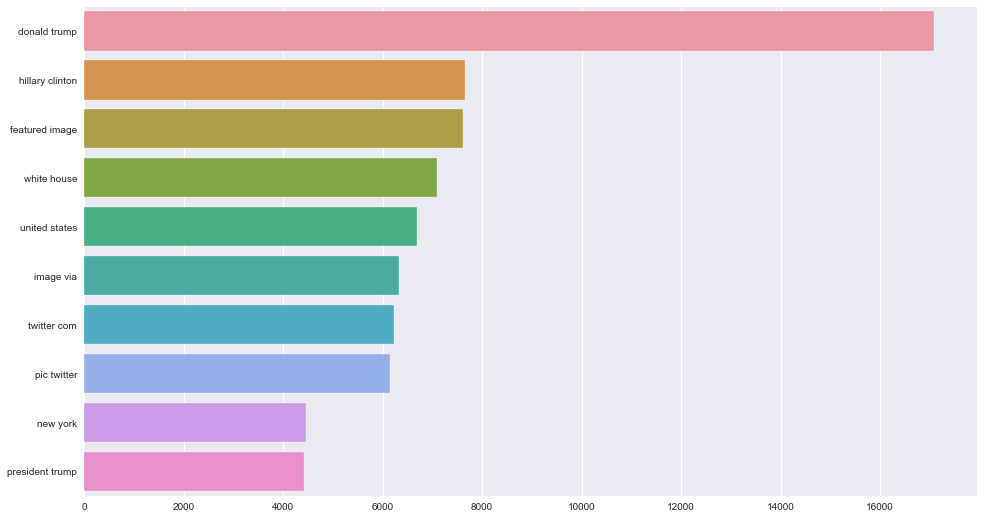

In [99]:
plt.figure(figsize = (16, 9))
most_common_bi = get_top_text_ngrams(df[df.Category == 0].text, 10, 2)
most_common_bi = dict(most_common_bi)
sns.barplot(x = list(most_common_bi.values()), y = list(most_common_bi.keys()))

### Trigram Analysis

Real News

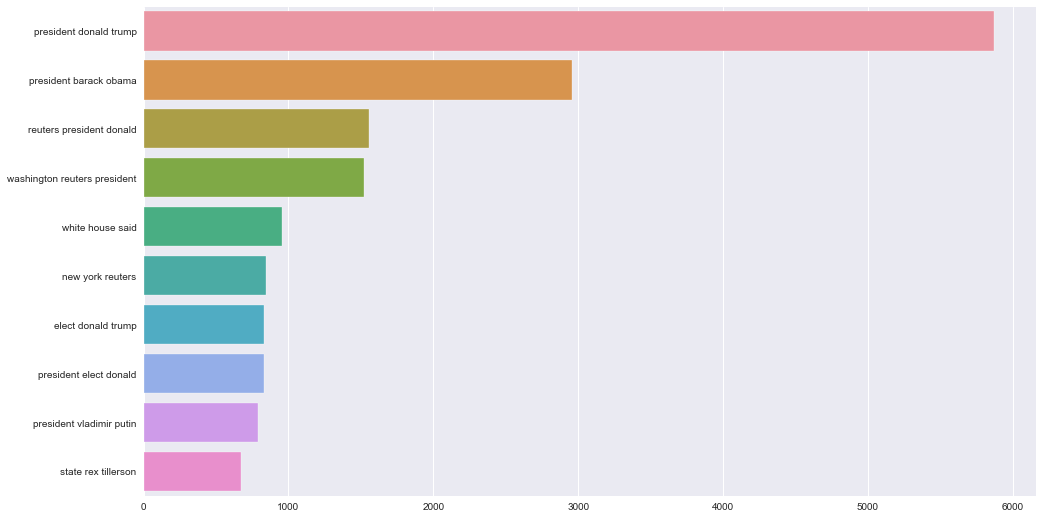

In [100]:
plt.figure(figsize = (16, 9))
most_common_tri = get_top_text_ngrams(df[df.Category == 1].text, 10, 3)
most_common_tri = dict(most_common_tri)
sns.barplot(x = list(most_common_tri.values()), y = list(most_common_tri.keys()))

Fake News

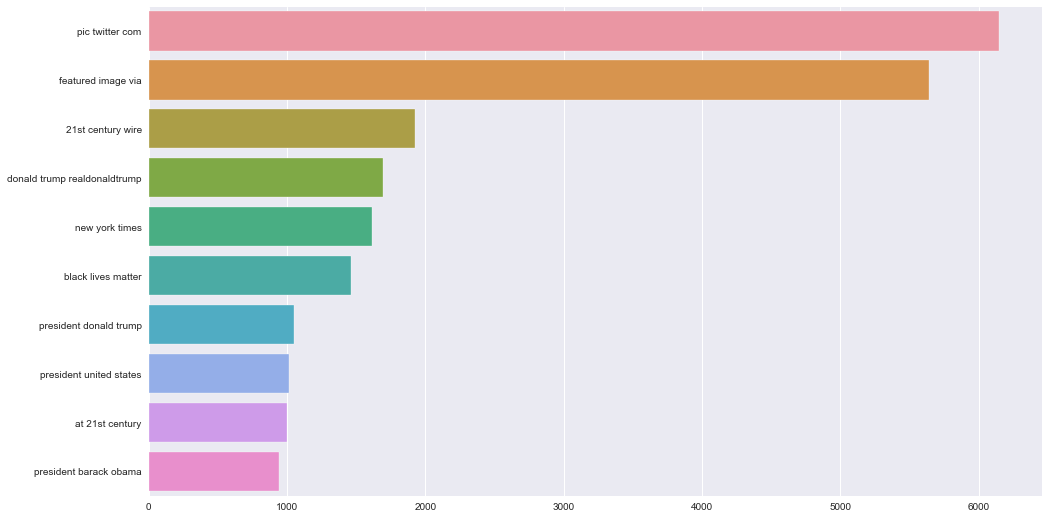

In [95]:
plt.figure(figsize = (16, 9))
most_common_tri = get_top_text_ngrams(df[df.Category == 0].text, 10, 3)
most_common_tri = dict(most_common_tri)
sns.barplot(x = list(most_common_tri.values()), y = list(most_common_tri.keys()))

# Modeling

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.Category, random_state = 23)

### Baseline Model

In [89]:
#Count vectorizing data for Dummy Classifier

vec = CountVectorizer(stop_words = stop, ngram_range = (1,3), lowercase = True)
X_b = vec.fit_transform(X_train)
X_test_b = vec.transform(X_test)

In [90]:
#Fitting & predicting the Dummy Classifier (Baseline Model) with the Count Vectorizer

from sklearn.dummy import DummyClassifier

dclf = DummyClassifier() 
dclf.fit(X_b, y_train)
y_preds_b = dclf.predict(X_test_b)

/Users/jasonjoseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [110]:
#Evaluation Metrics for Dummy Classifier

print("Test Accuracy Score:", metrics.accuracy_score(y_test, y_preds_b))
print("Test Precision Score:", metrics.precision_score(y_test, y_preds_b, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_test, y_preds_b, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_test, y_preds_b, average = "weighted"))

Test Accuracy Score: 0.4983518930957684
Test Precision Score: 0.498032108773898
Test Recall Score: 0.4983518930957684
Test F1 Score: 0.49816981096018054


### Random Forest Model

In [111]:
#Initializing RandomForest 

rfc = RandomForestClassifier(n_estimators = 200, criterion = "entropy", random_state = 0, n_jobs = -1)

In [120]:
#Fitting model with TF-IDF vectorized data

rfc.fit(tf_idf_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       random_state=0)

In [136]:
#Predicting Random Forest Model

rfc_preds = rfc.predict(tf_idf_test)

In [137]:
#Evaluation Metrics for Random Forest

print("Test Accuracy Score:", metrics.accuracy_score(y_test, rfc_preds))
print("Test Precision Score:", metrics.precision_score(y_test, rfc_preds, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_test, rfc_preds, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_test, rfc_preds, average = "weighted"))

Test Accuracy Score: 0.9931403118040089
Test Precision Score: 0.9931403746984155
Test Recall Score: 0.9931403118040089
Test F1 Score: 0.9931403353577094


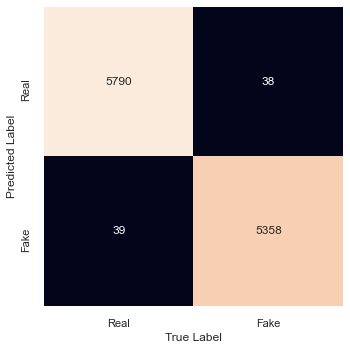

In [176]:
#Confusion Matrix for Random Forest

from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test, rfc_preds)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = ["Real", "Fake"], yticklabels = ["Real", "Fake"])
plt.xlabel('True Label')
plt.ylabel('Predicted Label');
plt.savefig('RF_CM.png')

### Multinomial Naive Bayes Model

In [150]:
#Initializing Naive Bayes Classifier 

from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB(alpha = .01, fit_prior = False)

In [151]:
#Fitting Naive Bayes Model with TF-IDF vectorized data
nbc.fit(tf_idf_train, y_train)

MultinomialNB(alpha=0.01, fit_prior=False)

In [152]:
#Predicting Naive Bayes Model

nbc_preds = nbc.predict(tf_idf_test)

In [153]:
#Evaluation Metrics for Naive Bayes

print("Test Accuracy Score:", metrics.accuracy_score(y_test, nbc_preds))
print("Test Precision Score:", metrics.precision_score(y_test, nbc_preds, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_test, nbc_preds, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_test, nbc_preds, average = "weighted"))

Test Accuracy Score: 0.946369710467706
Test Precision Score: 0.9464042482800709
Test Recall Score: 0.946369710467706
Test F1 Score: 0.9463561452732909


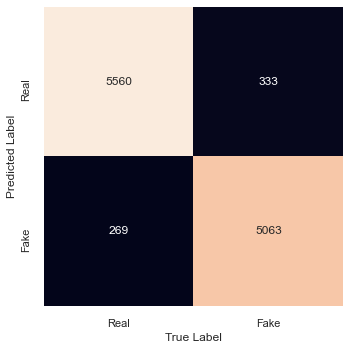

In [177]:
#Confusion Matrix for Naive Bayes for TF-IDF Vectorizer 

from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test, nbc_preds)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = ["Real", "Fake"], yticklabels = ["Real", "Fake"])
plt.xlabel('True Label')
plt.ylabel('Predicted Label');
plt.savefig('NB_CM.png')

Re-fitting model to Counter Vectorized train data 

In [154]:
#Fitting Naive Bayes Model with Counter Vectorized data
nbc.fit(X_b, y_train)

MultinomialNB(alpha=0.01, fit_prior=False)

In [155]:
#Predicting Naive Bayes Model

nbc_preds_b = clf.predict(X_test_b)

In [156]:
#Evaluation Metrics for Naive Bayes

print("Test Accuracy Score:", metrics.accuracy_score(y_test, nbc_preds_b))
print("Test Precision Score:", metrics.precision_score(y_test, nbc_preds_b, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_test, nbc_preds_b, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_test, nbc_preds_b, average = "weighted"))

Test Accuracy Score: 0.4950556792873051
Test Precision Score: 0.49282433803053327
Test Recall Score: 0.4950556792873051
Test F1 Score: 0.49247033215453284


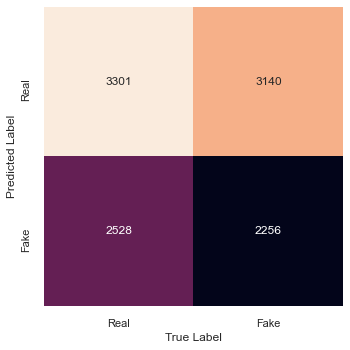

In [158]:
#Confusion Matrix for Naive Bayes with Counter Vectorizer

from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test, nbc_preds_bbb)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = ["Real", "Fake"], yticklabels = ["Real", "Fake"])
plt.xlabel('True Label')
plt.ylabel('Predicted Label');

### GridSearch for Naive Bayes Classifier

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
nb_params = {'alpha': [0.01,0.03,0.05,0.07,0.09,0.11,0.13],
              'fit_prior': [True, False]}

In [167]:
NB = MultinomialNB()

In [168]:
grid_nb = GridSearchCV(NB, param_grid = nb_params, cv = 7, scoring= "accuracy", verbose = 1, n_jobs = -1)
grid_nb.fit(tf_idf_train, y_train)

Fitting 7 folds for each of 14 candidates, totalling 98 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:    9.4s finished


GridSearchCV(cv=7, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13],
                         'fit_prior': [True, False]},
             scoring='accuracy', verbose=1)

In [169]:
#Examine the best model

print(grid_nb.best_score_)
# Dictionary containing the parameters (min_samples_split) used to generate that score

print(grid_nb.best_params_)
# Shows default parameters that we did not specify

print(grid_nb.best_estimator_)
#Identify the best score during fitting with cross-validation

0.9461586860672291
{'alpha': 0.01, 'fit_prior': False}
MultinomialNB(alpha=0.01, fit_prior=False)


In [171]:
#Using the best Naive Bayes to predict and check the scores

yc_preds_NB = grid_nb.best_estimator_.predict(tf_idf_test)
print('Naive Bayes Accuracy:',accuracy_score(y_test, yc_preds_NB),
      'Naive Bayes F1:',f1_score(y_test, yc_preds_NB, average = 'weighted'))

Naive Bayes Accuracy: 0.946369710467706 Naive Bayes F1: 0.9463561452732909


### SVM Model (Support Vector Machine)

In [160]:
#Initializing SVM Classifier

from sklearn import svm

In [161]:
#Setting hyperparameters for the SVM Model

svm_clf = svm.SVC(kernel = "linear", C = 10, class_weight = "balanced")

In [162]:
#Fitting the SVM Model with TF-IDF vectorized data

svm_clf.fit(tf_idf_train, y_train)

SVC(C=10, class_weight='balanced', kernel='linear')

In [163]:
#Predicting the Model

svm_preds = svm_clf.predict(tf_idf_test)

In [164]:
#Evaluation Metrics for SVM

print("Test Accuracy Score:", metrics.accuracy_score(y_test, svm_preds))
print("Test Precision Score:", metrics.precision_score(y_test, svm_preds, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_test, svm_preds, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_test, svm_preds, average = "weighted"))

Test Accuracy Score: 0.9955456570155902
Test Precision Score: 0.9955469104803261
Test Recall Score: 0.9955456570155902
Test F1 Score: 0.9955457773841019


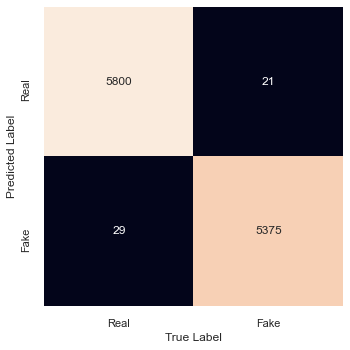

In [180]:
#Confusion Matrix for SVM with TF-IDF Vectorizer

from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test, svm_preds)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = ["Real", "Fake"], yticklabels = ["Real", "Fake"])
plt.xlabel('True Label')
plt.ylabel('Predicted Label');
plt.savefig('SVM_CM.png')